In [1]:
import tensorflow as tf
import numpy as np
import random as rnd
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

### Logistic regression AND Function

In [23]:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[0],[0],[1]])

In [24]:
input_size=2
output_layer_size=1
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size])
W_layer1=tf.Variable(tf.random_uniform([input_size,output_layer_size], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer1")

In [25]:
y = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1) 
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) 
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

In [26]:
init = tf.initialize_all_variables()
sess = tf.Session() 

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [27]:
sess.run(init)
for i in range(5000):
  sess.run(train_step, feed_dict={x: X, y_: Y})

In [28]:
correct_prediction = tf.equal(tf.round(y),y_) 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y_: Y})) 

1.0


In [30]:
w=[sess.run(b_layer1, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer1, feed_dict={x: X, y_: Y})]

In [31]:
m=((w[0]/w[2]))/((-w[0]/w[1]))

(-5.2, 5.2)

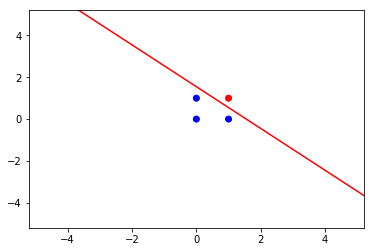

In [32]:
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
x2 = np.linspace(-5.2,5.2,100) # 100 numeros espaciados
plt.plot(x2,-w[0]/w[2]+m*x2,color='red')
plt.ylim([-5.2,5.2])
plt.xlim([-5.2,5.2])

### Logistic regression XOR Function

In [4]:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[1],[1],[0]])

In [5]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [6]:
input_size=2
output_layer_size=1
#Los placeholders son para los datos de entrada
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size]) #la y real
#La variables para lo que se va a ir calculando y modificando en el camino
W_layer1=tf.Variable(tf.random_uniform([input_size,output_layer_size], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer1")

In [7]:
y = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1) #la de nuestra
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

In [8]:
init = tf.initialize_all_variables()
sess = tf.Session() # tipo de sesion, puede ser interactiva

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [9]:
sess.run(init)
for i in range(5000):
  sess.run(train_step, feed_dict={x: X, y_: Y})

In [10]:
print(sess.run(y, feed_dict={x:[[0.8,0.5]]}))
print(sess.run(W_layer1, feed_dict={x: X, y_: Y}))

[[ 0.50020283]]
[[ 0.00723837]
 [ 0.00753253]]


In [11]:
correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y_: Y})) # las corremos

0.25


In [12]:
w=[sess.run(b_layer1, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer1, feed_dict={x: X, y_: Y})]

In [13]:
m=((w[0]/w[2]))/((-w[0]/w[1]))

(-5.2, 5.2)

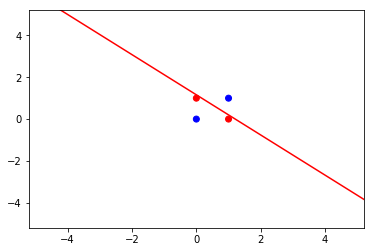

In [14]:
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
x2 = np.linspace(-5.2,5.2,100) # 100 numeros espaciados
plt.plot(x2,-w[0]/w[2]+m*x2,color='red')
plt.ylim([-5.2,5.2])
plt.xlim([-5.2,5.2])

No podemos separar linealmente el problema. Por lo que necesitamos una red con más de una neurano que mermita separar con dos líneas el problema

### ANN XOR Problem

In [24]:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[1],[1],[0]])

In [25]:
input_size=2
output_layer_size=1
hidden_layer_size=2
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size]) 
W_layer1 = tf.Variable(tf.random_uniform([input_size,hidden_layer_size], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([hidden_layer_size]), name="b_layer1")
W_layer2 = tf.Variable(tf.random_uniform([hidden_layer_size,output_layer_size], -1, 1), name="W_layer2")
b_layer2 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer2")

In [26]:
def neural_net(x):
    layer_1 = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1)
    y = tf.nn.sigmoid(tf.matmul(layer_1,W_layer2)+b_layer2)
    return y

In [27]:
logits = neural_net(x)

#Definimos la funcion de perdida, usando cross entropy
lossfn = tf.reduce_mean(tf.reduce_sum((y_-logits)**2))

#lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) 

train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

In [29]:
init = tf.initialize_all_variables()
sess = tf.Session() # tipo de sesion, puede ser interactiva

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [30]:
sess.run(init)
for i in range(5000):
  sess.run(train_step, feed_dict={x: X, y_: Y})

In [31]:
sess.run(b_layer1, feed_dict={x: X, y_: Y})

array([ 0.06813752, -0.14528409], dtype=float32)

In [32]:
sess.run(b_layer2, feed_dict={x: X, y_: Y})

array([-0.64728296], dtype=float32)

In [33]:
sess.run(W_layer1, feed_dict={x: X, y_: Y})

array([[ 0.57966572,  0.13827544],
       [ 0.65353072, -0.37108004]], dtype=float32)

In [34]:
sess.run(W_layer2, feed_dict={x: X, y_: Y})

array([[ 0.65196055],
       [ 0.51517308]], dtype=float32)

In [ ]:
correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y_: Y})) # las corremos

In [35]:
w=[sess.run(b_layer1, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer1, feed_dict={x: X, y_: Y})]

In [36]:
m=((w[0]/w[2]))/((-w[0]/w[1]))

(-5.2, 5.2)

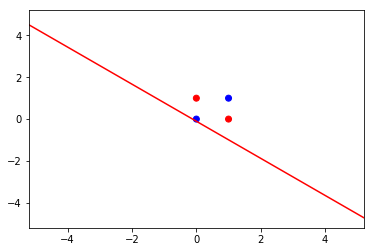

In [37]:
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
x2 = np.linspace(-5.2,5.2,100) # 100 numeros espaciados
plt.plot(x2,-w[0]/w[2]+m*x2,color='red')
plt.ylim([-5.2,5.2])
plt.xlim([-5.2,5.2])

### Circulo 

In [3]:
Xs = pd.DataFrame(np.random.uniform(-6,6,10000),columns=['x1'])
Xs['x2'] = np.random.uniform(-6,6,10000)

In [4]:
Xs.head()

,x1,x2
0,-3.362702,2.445104
1,-4.697147,3.906123
2,-1.003248,2.171073
3,5.422008,-4.403349
4,-1.291389,-3.629690


In [5]:
Xs['y']=np.where((Xs['x1']**2+Xs['x2']**2<9),1,0)

In [6]:
Xs.head()

,x1,x2,y
0,-3.362702,2.445104,0
1,-4.697147,3.906123,0
2,-1.003248,2.171073,1
3,5.422008,-4.403349,0
4,-1.291389,-3.629690,0


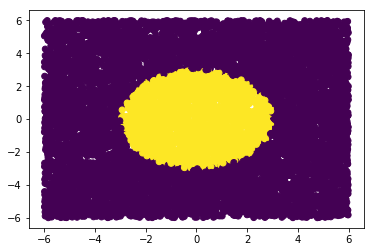

In [7]:
plt.scatter(Xs['x1'], Xs['x2'], c=Xs['y'])

In [8]:
Xc=pd.DataFrame(Xs['x1'])
Xc['x2']=pd.DataFrame(Xs['x2'])


In [9]:
Xc=np.asarray(Xc)

In [10]:
Xc.shape

(10000, 2)

In [11]:
Yc=np.asarray(Xs[['y']])

In [12]:
Yc.shape

(10000, 1)

In [13]:
input_size=2
output_layer_size=1
hidden_layer_size=2
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size]) 
W_layer1 = tf.Variable(tf.random_uniform([input_size,hidden_layer_size], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([hidden_layer_size]), name="b_layer1")
W_layer2 = tf.Variable(tf.random_uniform([hidden_layer_size,output_layer_size], -1, 1), name="W_layer2")
b_layer2 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer2")

In [14]:
def neural_net(x):
    layer_1 = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1)
    y = tf.nn.sigmoid(tf.matmul(layer_1,W_layer2)+b_layer2)
    return y

In [15]:
logits = neural_net(x)

#Definimos la funcion de perdida, usando cross entropy
lossfn = tf.reduce_mean(tf.reduce_sum((y_-logits)**2))

#lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) 

train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

In [16]:
init = tf.initialize_all_variables()
sess = tf.Session() # tipo de sesion, puede ser interactiva

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [17]:
sess.run(init)
for i in range(5000):
  sess.run(train_step, feed_dict={x: Xc, y_: Yc})

In [23]:
correct_prediction = tf.equal(tf.round(logits),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: Xc, y_: Yc})) # las corremos

0.801


In [30]:
y_pred=sess.run(logits, feed_dict={x: Xc, y_: Yc})

In [36]:
y_pred=sess.run(logits, feed_dict={x: Xc})